## Importation des librairies

In [1]:
from qiskit import *
from qiskit import Aer
from qiskit.visualization import plot_histogram

## Création d'un circuit de 8 Qbits

Chaque Qbit du 0 à 3 représente une personne
Chaque Qbit de 4 à 7 représente un raisonnement

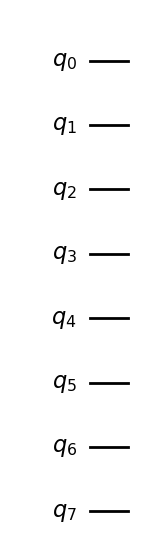

In [4]:
circ = QuantumCircuit(8)
circ.draw('mpl')

Où :
q0 --> Alice
q1 --> Bob
q2 --> Charlie
q3 --> Dahlia
q4 --> Raisonnement d'Alice
q5 --> Raisonnement de Bob
q6 --> Raisonnement de Charlie
q7 --> Raisonnement de Dahlia

## Programmation de portes

### État initial
On place une porte Hadamard sur chaque personne
Une porte Hadamard place un Qbit en superposition des états 0 et 1, et permet de créer des probabilités
de 50 % pour l'obtention d'un état ou de l'autre, et d'explorer tous les cas figure de l'énigme en parallèle

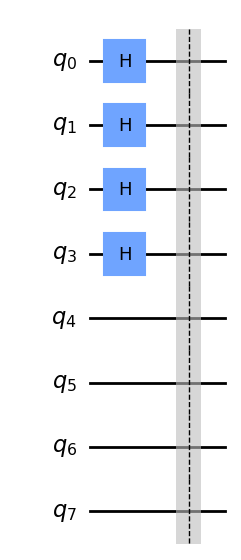

In [5]:
circ.h(0)
circ.h(1)
circ.h(2)
circ.h(3)
circ.barrier(range(8))
circ.draw('mpl')

L'état 0 correspond à pair ou Orange
L'état 1 correspond à impair ou Indigo  

On ajoute 3 portes C-not pour représenter les couleurs des 3 chevelures devant Alice et calculer s'il y a un nombre pair ou impair de chevelures Indigo
Une porte C*-not utilise 2 bits / un Qbit de contrôle ainsi qu'un Qbit cible. 
Si le Qbit de contrôle est en état 1, une porte Not est appliquée au Qbit cible 

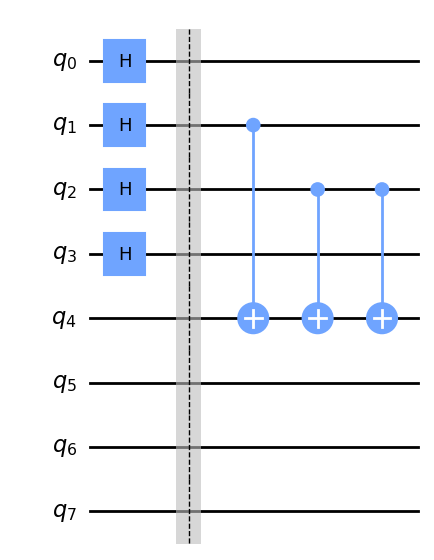

In [6]:
circ.cx(1,4)
circ.cx(2,4)
circ.cx(2,4)
circ.barrier(range(8))
circ.draw('mpl')

Ici, la réponse d'Alice est consignée dans l'état du Qbit 4
Les 3 personnes suivantes écoutent la réponse et prennent en note la oparité des chevelures Indigo
Pour représenter cela, on ajoute encore des portes C-not

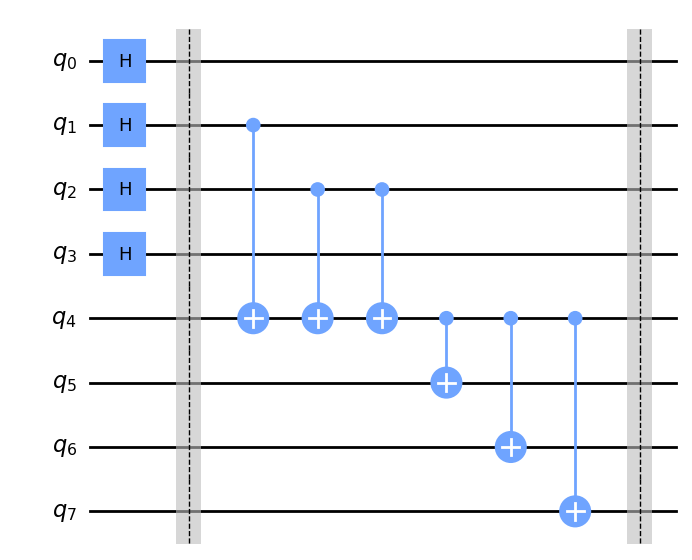

In [7]:
circ.cx(4,5)
circ.cx(4,6)
circ.cx(4,7)
circ.barrier(range(8))
circ.draw('mpl')

Bob voit les couleurs des chevelures devant lui et s'en sert pour déterminer la couleur de sa propre chevelure.
Les 2 participants restants prennent en note cette couleur. 

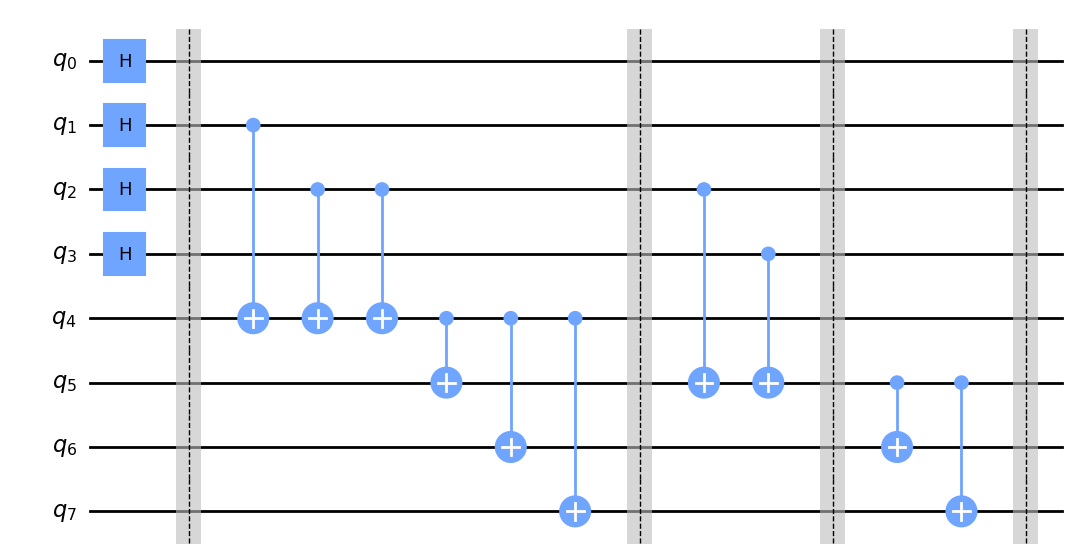

In [8]:
circ.cx(2,5)
circ.cx(3,5)
circ.barrier(range(8))
circ.cx(5,6)
circ.cx(5,7)
circ.barrier(range(8))
circ.draw('mpl')

Charlie note la couleur de la chevelure devant lui, et annonce la couleur de sa propre chevelure

In [9]:
circ.cx(3,6)
circ.barrier(range(8))
circ.draw('mpl')

Dahlia note finalement cette réponse et annonce la couleur de sa propre chevelure

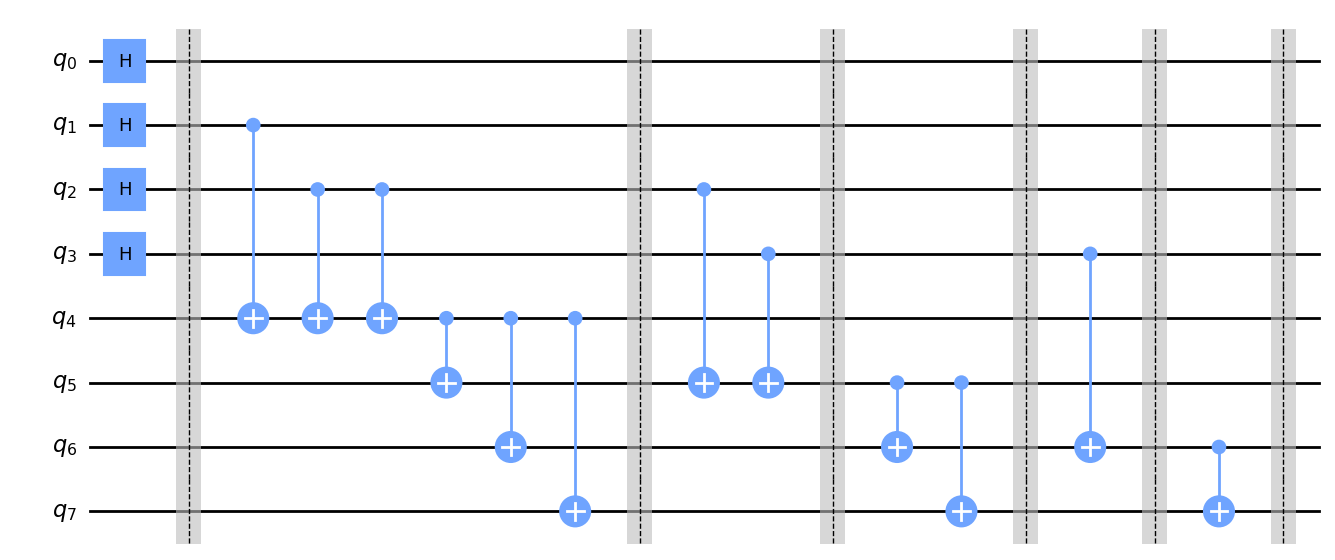

In [11]:
circ.cx(6,7)
circ.barrier(range(8))
circ.draw('mpl')

## Simulation

In [13]:
# Création du moteur de calcul à l'aide de la librairie Aer
backend = Aer.get_backend('statevector_simulator') 

# On exécute le circuit sur le simulateur
simulator = backend.run(circ)

# On récupère les résultats
result = simulator.result()

## Mesure du circuit

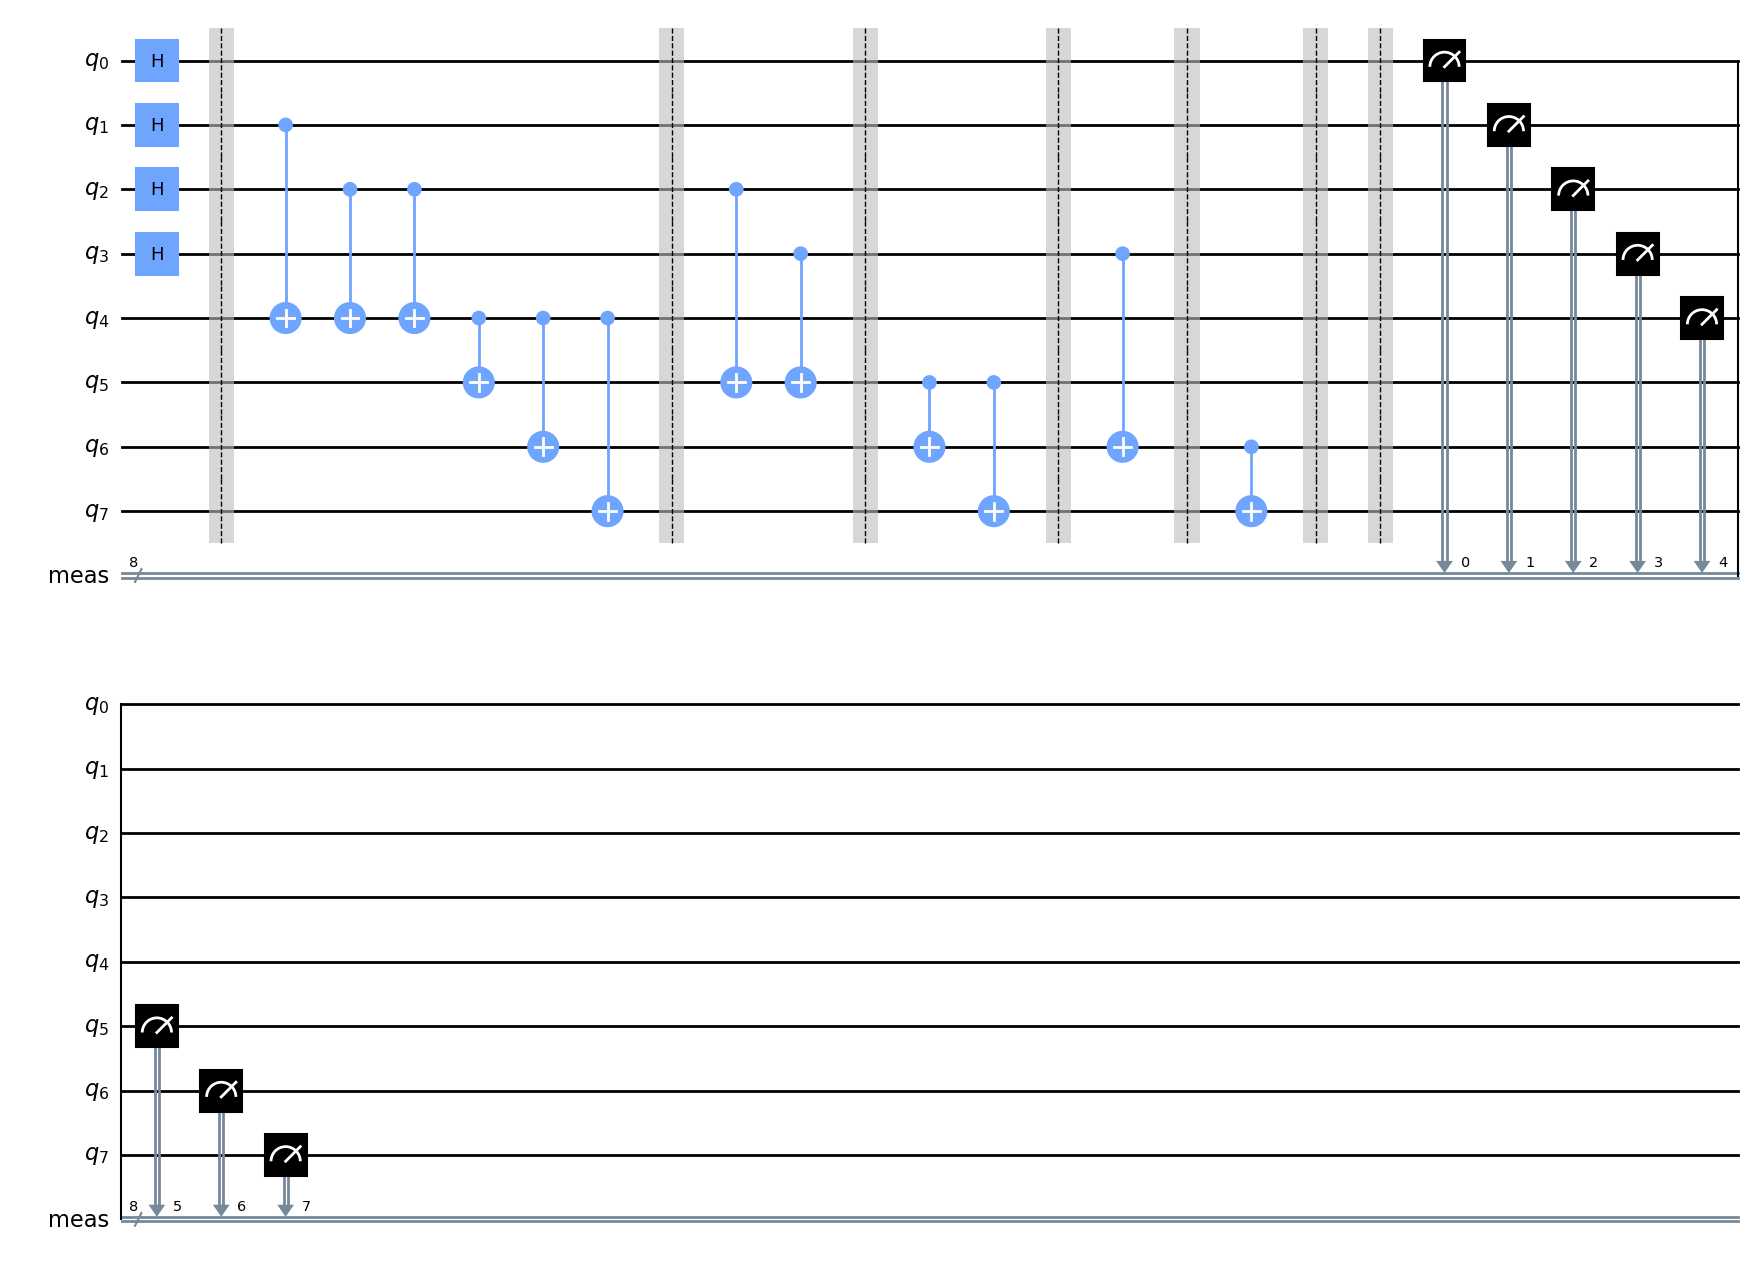

In [14]:
# Mesurer les 8 Qbits sur des bits classiques
circ.measure_all()

circ.draw('mpl')

## Affichage et analyse des résultats

In [15]:
counts = result.get_counts()
print(counts)

{'00000000': 0.0625, '00000001': 0.0625, '00110010': 0.0625, '00110011': 0.0625, '01010110': 0.0625, '01010111': 0.0625, '01100100': 0.0625, '01100101': 0.0625, '10011010': 0.0625, '10011011': 0.0625, '10101000': 0.0625, '10101001': 0.0625, '11001100': 0.0625, '11001101': 0.0625, '11111110': 0.0625, '11111111': 0.0625}


Il y existent 16 combinaisons possibles des couleurs de chevelure.
Les Qbits 1 à 3 sont toujours identiques aux Qbits 5 à 7, car les réponses de Bob, Charlie et Dahlia correspondent toujours à la couleur de ses propres chevelures
Le Qbit 0 contient la couleur de la chevelure d'Alice
Le Qbit 7 l'information à propos de la parité du nombre de chevelures Indigo de Bob, Charlie et Dahlia.
Rappel : on lit toujours les Qbits de droite à gauche